In [73]:
import sys
import math
import cv2 
import numpy  as np
import matplotlib.pyplot as plt


In [74]:
# Set the default file
file = r'pictures\maxres2.jpg'
    # Load the image (you can directly use the file path)
src = cv2.imread(file, cv2.IMREAD_GRAYSCALE)

Global Processing Hough Transform

In [75]:
   # Perform Canny edge detection
dst = cv2.Canny(src, 50, 200, None, 3)
    
    # Convert edges to BGR for display
cdst = cv2.cvtColor(dst, cv2.COLOR_GRAY2BGR)
cdstP = np.copy(cdst)
    
    # Standard Hough Line Transform
lines = cv2.HoughLines(dst, 1, np.pi / 180, 150, None, 0, 0)

if lines is not None:
        for i in range(0, len(lines)):
            rho = lines[i][0][0]
            theta = lines[i][0][1]
            a = math.cos(theta)
            b = math.sin(theta)
            x0 = a * rho
            y0 = b * rho
            pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
            pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
            cv2.line(cdst, pt1, pt2, (0, 0, 255), 3, cv2.LINE_AA)
    
    # Probabilistic Hough Line Transform
linesP = cv2.HoughLinesP(dst, 1, np.pi / 180, 50, None, 50, 10)
    
if linesP is not None:
        for i in range(0, len(linesP)):
            l = linesP[i][0]
            cv2.line(cdstP, (l[0], l[1]), (l[2], l[3]), (0, 0, 255), 3, cv2.LINE_AA)
  

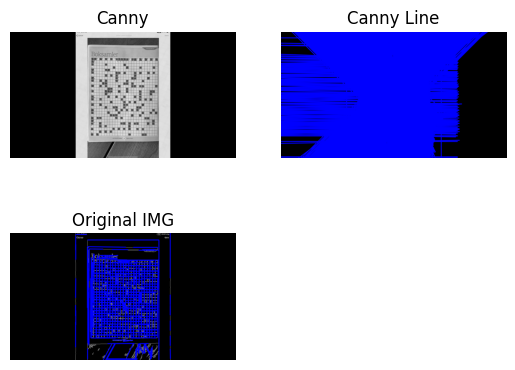

In [76]:
plt.subplot(2, 2, 1)
plt.imshow(src, cmap='gray')
plt.title("Canny")
plt.axis('off')


plt.subplot(2, 2, 2)
plt.imshow(cdst, cmap='gray')
plt.title("Canny Line")
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(cdstP, cmap='gray')
plt.title("Original IMG")
plt.axis('off')

plt.show()

*Local Processing using Sobel*

In [77]:
image_path = 'pictures\maxres2.jpg' 

src = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
grad_x = cv2.Sobel(src, cv2.CV_64F, 1, 0, ksize=3)  # Gradient in X direction
grad_y = cv2.Sobel(src, cv2.CV_64F, 0, 1, ksize=3)  # Gradient in Y direction
    
    # Compute the absolute values of the gradients
abs_grad_x = cv2.convertScaleAbs(grad_x)
abs_grad_y = cv2.convertScaleAbs(grad_y)
    
    # Combine the gradients to get the total edge strength (magnitude)
grad_magnitude = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)






In [78]:
cv2.imshow('Original Image', src)
cv2.imshow('Sobel Grad X', grad_x)
cv2.imshow('Sobel Grad Y', grad_y)
cv2.imshow('Sobel Magnitude', grad_magnitude)
cv2.imshow('Global Treshold', cdstP)
    
    # Wait for a key press and close all windows
cv2.waitKey(0)
cv2.destroyAllWindows()

In [79]:
image_path2 = r'pictures\R.jpeg' 

src2 = cv2.imread(image_path2, cv2.IMREAD_GRAYSCALE)
blurred_img = cv2.GaussianBlur(src2, (3,3), 0)
    
_, global_thresh = cv2.threshold(src2, 180, 255, cv2.THRESH_BINARY)

 
    # Step 2: Apply Adaptive Thresholding
adaptive_thresh_mean = cv2.adaptiveThreshold(blurred_img, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                                cv2.THRESH_BINARY, 13, 20)
adaptive_thresh_gaussian = cv2.adaptiveThreshold(blurred_img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                                    cv2.THRESH_BINARY, 7, 1.2)

combined_result = cv2.addWeighted(global_thresh, .5, adaptive_thresh_mean, .5, 0)

    
  


In [80]:
  # Step 3: Display the results
cv2.imshow('Original Image', src2)
cv2.imshow('Global Thresholding (127)', global_thresh)
cv2.imshow('Adaptive Thresholding (Mean)', adaptive_thresh_mean)
cv2.imshow('Adaptive Thresholding (Gaussian)', adaptive_thresh_gaussian)
cv2.imshow('combined_result', combined_result)
    
    # Wait for a key press and close all windows
cv2.waitKey(0)
cv2.destroyAllWindows()